In [26]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix


In [27]:
# load data set
df = pd.read_csv("HousingData.csv")

In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [29]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [30]:
# data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [31]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing

### 1. Deal with missing values

In [32]:
# check null values 
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [33]:
# Percentage of null values
df.isnull().sum() / len(df) * 100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [34]:
# Fill null values
df2 = df.copy()
df2[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']]=df2[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']].fillna(df2[['CRIM','AGE','INDUS','LSTAT','CHAS','ZN']].mean())

In [35]:
# check null values 
df2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Text(0.5, 1.0, 'Boxplot to Identify Outliers')

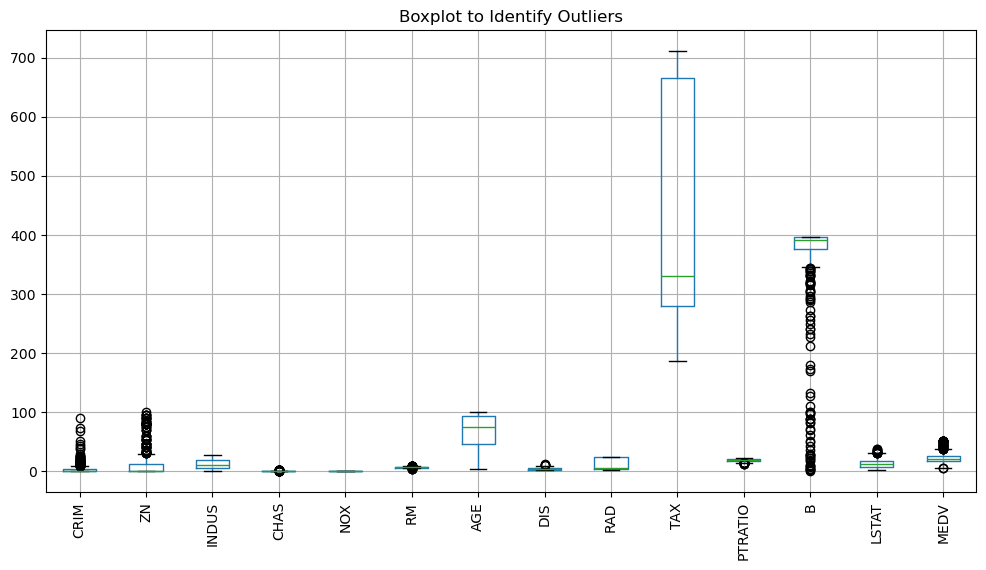

In [36]:

# Create boxplots for all numerical columns to check outliers
plt.figure(figsize=(12,6))
df2.boxplot()
plt.xticks(rotation=90)  # Rotation of column name in x axis 
plt.title("Boxplot to Identify Outliers")


### 2. Remove Outlires

In [37]:
# use IQR approach to remove outliers

q1 =df2.quantile(0.25)
q3 = df2.quantile(0.75)
# Inteqaurtile Range Formula 
iqr = q3 - q1 
# formula of upper and lower outliers 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace moderate values with upper/lower bounds instead of removing rows
df2_clean = df2.copy()
for i in df2.columns:
    df2_clean[i] = np.where(df2_clean[i] < lower_bound[i] , lower_bound[i] , df2_clean[i])
    df2_clean[i] = np.where(df2_clean[i] > upper_bound[i] , upper_bound[i] , df2_clean[i])


Text(0.5, 1.0, 'Boxplot After Removing Outliers')

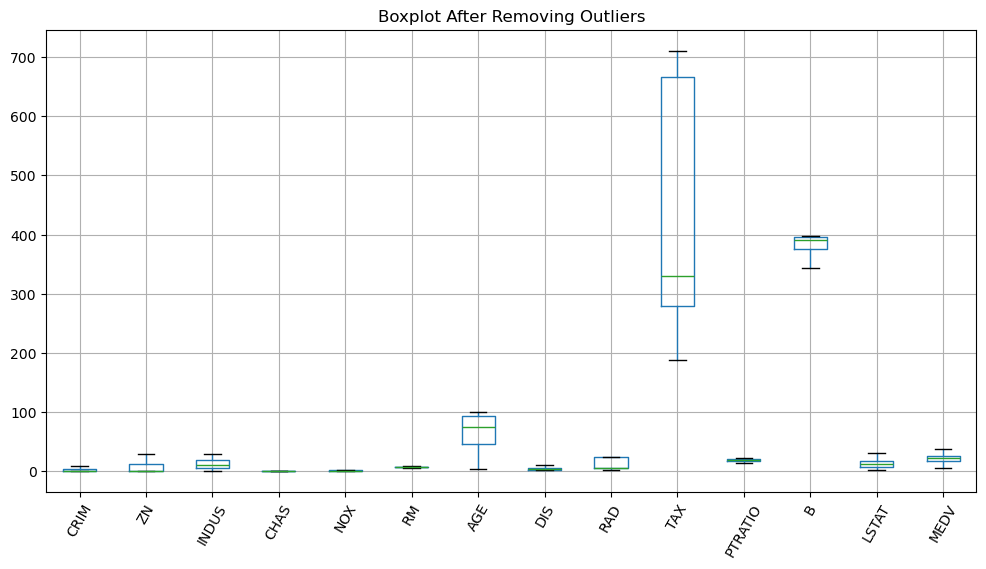

In [38]:
# Check throug box plot that outliers remove 

plt.figure(figsize=(12,6))
df2_clean.boxplot()
plt.xticks(rotation=60)
plt.title("Boxplot After Removing Outliers")

<Axes: >

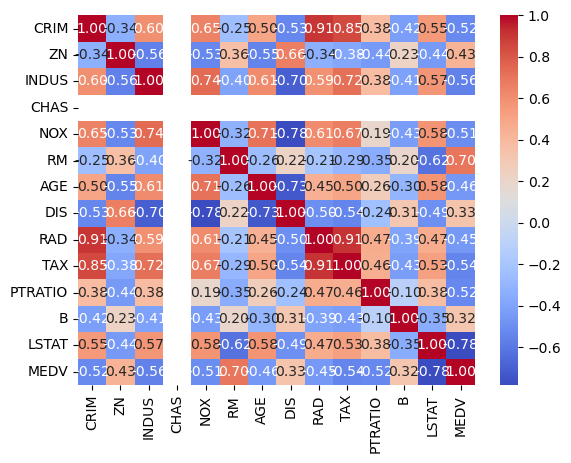

In [39]:

corr_matrix = df2_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [40]:
df2_clean.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 1. Select Features and Labels

In [41]:
# features and label decide and data split 
x = df2_clean.drop(columns="CRIM")
y = df2_clean["CRIM"]


## 2. Split data for training

In [42]:

x_train , x_test, y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

## 3. Normalization

In [43]:

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Training

In [44]:
model = LinearRegression()

In [45]:
model.fit(x_train , y_train)

LinearRegression()

In [46]:
score_rate = model.score(x_train , y_train)
print("Training Accuracy : " ,score_rate)

Training Accuracy :  0.8558617836399095


In [47]:
y_predict = model.predict(x_test)
y_predict

array([ 9.02591186e-01, -7.65300902e-02,  1.30177385e+00, -3.91163829e-01,
        7.00356432e+00,  8.60545497e-01,  8.32791044e-01,  1.30287867e+00,
        6.45315436e+00,  1.47771157e+00,  1.31807440e+00,  1.42847410e+00,
        7.98656882e+00,  5.79813430e-01,  5.51619878e-01,  6.08832275e+00,
        2.38125670e-01,  7.73045618e+00,  1.35378672e-01,  7.12279095e+00,
       -5.75167959e-02,  1.91641230e-01,  1.05312783e+00, -6.06214416e-01,
        7.20733724e+00,  7.08580433e+00,  5.53652499e-01,  7.34486946e+00,
        7.41450853e-01,  1.26393826e+00,  1.09081105e+00,  1.47589899e-01,
        7.36479776e+00,  6.34961373e+00,  7.02372589e+00,  2.00036046e+00,
       -1.12121390e+00,  1.91415851e-01,  2.53424645e-01, -7.48158155e-02,
        1.38889095e+00,  1.32941078e+00,  1.28989275e-01,  3.12903422e-01,
       -1.02357066e-01,  6.97316736e+00,  9.25071243e-01, -3.37319670e-01,
        6.54781037e+00, -9.10362303e-02,  1.28259836e+00,  3.70878219e-01,
        7.40128386e-01,  

## Evaluation

In [48]:
MSE = mean_squared_error(y_test , y_predict)
print("Mean Square Error : ",MSE)

Mean Square Error :  1.3088819250316461


In [49]:
RMSE = root_mean_squared_error(y_test , y_predict)
print("root Mean Squared Error" , RMSE)

root Mean Squared Error 1.144063776645186


In [50]:
MAE = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error : " , MAE)

Mean Absolute Error :  0.8499390075887929
